# Imports and matplotlib config

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('axes', labelsize=14)

## Generates a plot showing the amount of rules absorbed by rule ID, grouped by the hundreds.

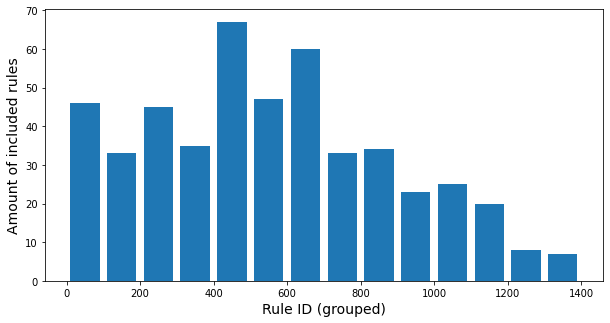

In [13]:
z = open('included-rules.txt', 'r')

unique = set()
for line in z:
    x = line.replace('\n', '').split('  ')
    ids = x[1].replace('[', '').replace(']', '').split(', ')
    for i in ids:
        if i == '':
            continue
        unique.add(int(i))

r = (0, 1400)
bins = 14
unique = list(unique)
fig = plt.figure(figsize=(10,5))
plt.hist(unique, bins, r, histtype = 'bar', rwidth = 0.8)
plt.xlabel('Rule ID (grouped)')
plt.ylabel('Amount of included rules')
fig.savefig('inclusion_hist.jpg', bbox_inches='tight', dpi=500)


## Generates a plot that shows a comparison of rules with their respective inclusions by rule ID. The rule ID represents the order in which rules were added

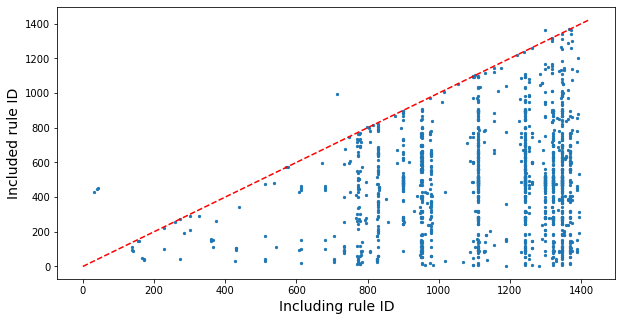

In [14]:
z = open('included-count.txt', 'r')

x_ax = []
y_ax = []

y = open('../regex-inclusion/rMinus.txt', 'r')
lines = y.readlines()
for line in z:
    x = line.replace('\n', '').split('  ')
    ids = x[2].replace('[', '').replace(']', '').split(', ')
    if int(x[1]) > 0:
        for i in ids:
            if not i == '':
                x_ax.append(int(x[0]))
                y_ax.append(int(i))

fig = plt.figure(figsize=(10,5))
plt.scatter(x_ax, y_ax, s=5)
plt.xlabel('Including rule ID')
plt.ylabel('Included rule ID')
plt.plot(list(range(0,1426)), list(range(0,1426)), '--r', label='y=2x+1')
fig.savefig('inclusion_comparison.jpg', bbox_inches='tight', dpi=500)


## Generates a plot showing the amount of rules that include n other rules

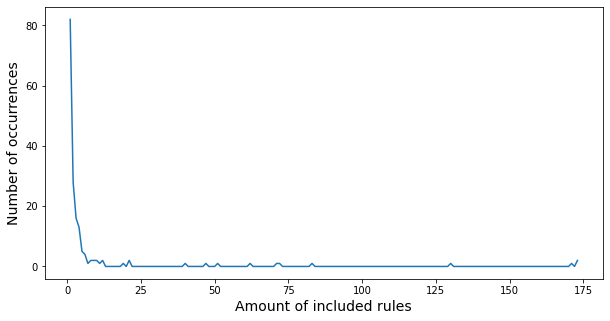

In [15]:
x = list(range(1,174))
y = [0] * 174

z = open('included-count.txt', 'r')
for line in z:
    l = line.split("  ")
    y[int(l[1])] += 1

y = y[1:]


fig = plt.figure(figsize=(10,5))

plt.plot(x, y)
plt.xlabel('Amount of included rules')
plt.ylabel('Number of occurrences')
fig.savefig('inclusion_count_by_id.jpg', bbox_inches='tight', dpi=500)
plt.show()

## Filters the included rules for unique rules. Unique rules are added to rMinus-minimized.txt

In [16]:
z = open('included-rules.txt', 'r')

unique = set()
for line in z:
    x = line.replace('\n', '').split('  ')
    ids = x[1].replace('[', '').replace(']', '').split(', ')
    for i in ids:
        if i == '':
            continue
        unique.add(int(i))

unique = list(unique)
print(len(unique))
f = open('../regex-inclusion/rMinus.txt', 'r')
g = open('rMinus-minimized.txt', 'w')
l_count = 0
for line in f:
    if l_count not in unique:
        g.write(line)
    l_count += 1


483


## Generates plots showing the number of times a rule was included by other rules. Two plots are generated, one with linear scale and one with logarithmic scale

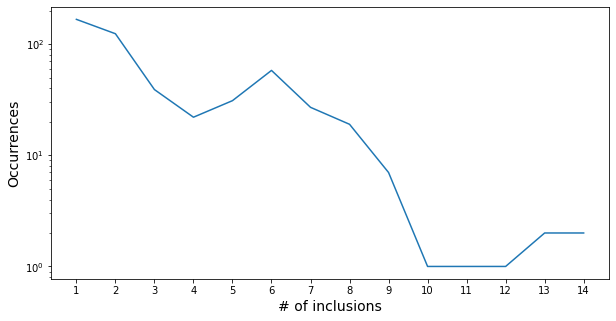

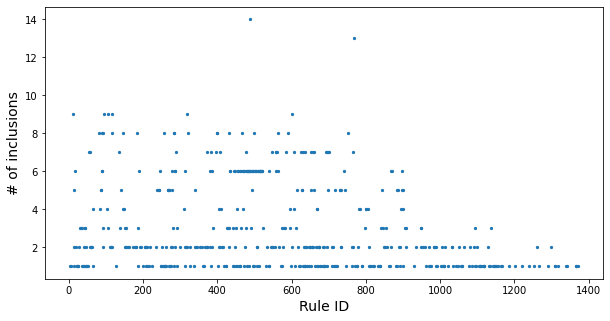

In [17]:
x = list(range(0,1426))
y = [0] * 1426

z = open('included-count.txt', 'r')
for line in z:
    l = line.replace('\n', '').split('  ')
    ids = l[2].replace('[', '').replace(']', '').split(', ')
    for i in ids:
        if i == '':
            continue
        else:
            y[int(i)] += 1

y_second = [0] * 15
for occ in y:
    y_second[occ] += 1
y_second = y_second[1:]
y_second = np.asarray(y_second) + 1
fig = plt.figure(figsize=(10,5))

plt.plot(list(range(1,15)), y_second)
plt.xticks(list(range(1,15)))
plt.yscale('log')
plt.xlabel('# of inclusions')
plt.ylabel('Occurrences')
fig.savefig('amount_of_inclusions_graph.jpg', bbox_inches='tight', dpi=500)
plt.show()


x_ax = []
y_ax = []
count = 0
for i in y:
    if not i == 0:
        x_ax.append(count)
        y_ax.append(i)
    count += 1


fig = plt.figure(figsize=(10,5))

plt.scatter(x_ax, y_ax, s=5)
plt.xlabel('Rule ID')
plt.ylabel('# of inclusions')
fig.savefig('amount_of_inclusions.jpg', bbox_inches='tight', dpi=500)
plt.show()